## Time series, eval(), and query() method 

# Task A

You are supposed to work on the google dataset by which you are expect to find out any interesting findings thhat you can share. This finding might be visually aided or not.

In [ ]:
#getting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data 
import datetime as dt
import seaborn as sns

I tried multiple things to get google data but I got some errors. When I searched it i find that Python pandas datareader no longer works for google dataset. So I looked for yahoo datasets in this project and  I will use this data.

In [ ]:
pip install yfinance --upgrade --no-cache-dir   # fistly I installed yfinance to use yfinance

     |████████████████████████████████| 6.3 MB 6.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=8857ed2fddd8f852a2cd4bdb5b14be03334e13fe2f128200f504f85f13f399de
  Stored in directory: /tmp/pip-ephem-wheel-cache-9llgf6j6/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# Getting first data from 2012 to 2016. Data includes different columns including open, close, low, high and volume
import yfinance as yf 
data1 = yf.download('MSFT', start = '2012-01-01', end='2017-01-01')
data1.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.707485,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,22.218346,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.445398,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.794079,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.494051,59706800


In [ ]:
data1.values.nbytes

60384

In [ ]:
data1.info() # Let's first look information of the data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


## data1 has no null value
## there are 1258 rows, except volume value all of them are float

In [ ]:
# Let's look at the description of the data
data1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,41.337909,41.694420,40.993998,41.366320,36.357910,3.935960e+07
std,9.970369,10.050666,9.896256,9.978039,10.144201,2.058019e+07
min,26.379999,26.629999,26.260000,26.370001,21.707489,8.409600e+06
25%,31.820000,32.042500,31.600000,31.825000,26.276389,2.721665e+07
50%,41.379999,41.715000,41.045000,41.480000,36.376205,3.492490e+07
75%,48.625000,48.919998,48.117501,48.634999,42.903934,4.629480e+07
max,63.840000,64.099998,63.410000,63.619999,59.260712,2.484285e+08


To show interesting results, I started with every year's closure mean value and I realized that close value is increased over the years.

In [ ]:
data1.loc['2012-01-01':'2013-01-01']['Close'].mean() # mean of 2012 closure values

29.820959968566896

In [ ]:
data1.loc['2013-01-01':'2014-01-01']['Close'].mean()   # mean of 2013 closure values

32.491904811253626

In [ ]:
data1.loc['2014-01-01':'2015-01-01']['Close'].mean()  # mean of 2014 closure values

42.45349213433644

In [ ]:
data1.loc['2015-01-01':'2016-01-01']['Close'].mean()  # mean of 2015 closure values

46.7142857294234

In [ ]:
data1.loc['2016-01-01':'2017-01-01']['Close'].mean()  # mean of 2016 closure values

55.25932519398038

In [ ]:
# I tried different way(easy) to do same operation above
data_years = data1.to_period('Y')  # firstly I changed date index from date to years via this process I will group data by years 
data_years.groupby('Date')['Close'].mean() # then I wanted to see mean values according to close column

Date
2012    29.820960
2013    32.491905
2014    42.453492
2015    46.714286
2016    55.259325
Freq: A-DEC, Name: Close, dtype: float64

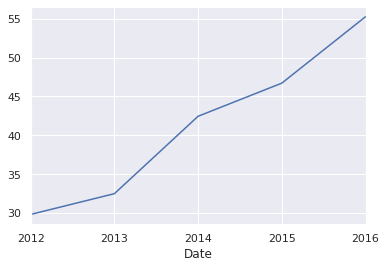

In [ ]:
#Let's visualize the mean values by years
data_years.groupby('Date')['Close'].mean().plot()

In [ ]:
data_month = data1.to_period('M')
data_month.groupby('Date')['Close'].mean() # With this transaction, we can observe the closing average of each month for 5 years.

Date
2012-01    28.516500
2012-02    30.825000
2012-03    32.195000
2012-04    31.505500
2012-05    30.226363
2012-06    29.680476
2012-07    29.757143
2012-08    30.357391
2012-09    30.782105
2012-10    29.066191
2012-11    27.811905
2012-12    26.966000
2013-01    27.236667
2013-02    27.704211
2013-03    28.141000
2013-04    29.870909
2013-05    33.950909
2013-06    34.632500
2013-07    33.650454
2013-08    32.485000
2013-09    32.523500
2013-10    34.382174
2013-11    37.362500
2013-12    37.455714
2014-01    36.350476
2014-02    37.241579
2014-03    38.985238
2014-04    40.134285
2014-05    39.920000
2014-06    41.361905
2014-07    43.214546
2014-08    44.260001
2014-09    46.412381
2014-10    45.196087
2014-11    48.405263
2014-12    47.493182
2015-01    45.514000
2015-02    43.078421
2015-03    42.131818
2015-04    43.466666
2015-05    47.530000
2015-06    45.964091
2015-07    45.611818
2015-08    45.506667
2015-09    43.561428
2015-10    48.700909
2015-11    53.885000
2015-12 

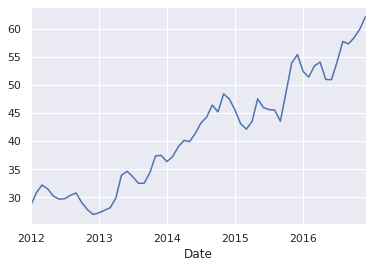

In [ ]:
data_month.groupby('Date')['Close'].mean().plot() 
# We can see the month trends from this chart.
# But from 2014 to 2015, there was a continuous increase and a different situation was observed from other years.

## Let's visualize close values from the original data

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

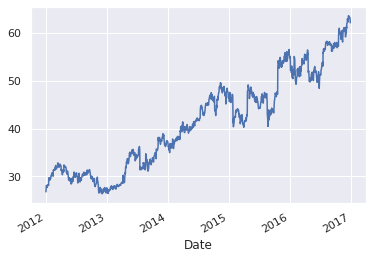

In [ ]:
data_close = data1['Close']
data_close.plot()  # via this plot we can see that mean of close values are increased by years

## Let's visualize this graph this time with another way

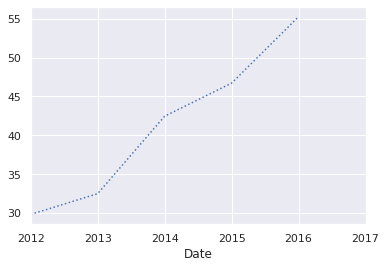

In [ ]:
data_close.resample('BA').mean().plot(style=':') # to see mean values more clearly

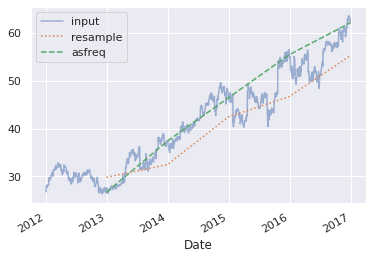

In [ ]:
data_close.plot(alpha=0.5, style='-')             # here we can see mean and data values easily.
data_close.resample('BA').mean().plot(style=':')
data_close.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

In [ ]:
# Here there is second data
# from pandas_datareader import data as pdr
# import yfinance as yf

# yf.pdr_override()

# data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")
# data

# Task B

You are supposed to work on the Fremont Bridge dataset by which you are expect to find out any interesting findings that you can share. You are advised to use visualization.

In [ ]:
 !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4496k    0 4496k    0     0  1066k      0 --:--:--  0:00:04 --:--:-- 1066k


In [ ]:
Fremont_bridge = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
Fremont_bridge.head() # data has 3 column east, west and total

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


## Descriptive Analysis

In [ ]:
Fremont_bridge.info() # 144352 rows, big data compared to previous data 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144374 entries, 2019-11-01 00:00:00 to 2021-08-31 23:00:00
Data columns (total 3 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Fremont Bridge Total          144352 non-null  float64
 1   Fremont Bridge East Sidewalk  144352 non-null  float64
 2   Fremont Bridge West Sidewalk  144352 non-null  float64
dtypes: float64(3)
memory usage: 4.4 MB


In [ ]:
Fremont_bridge.mean()

Fremont Bridge Total            111.188013
Fremont Bridge East Sidewalk     50.529241
Fremont Bridge West Sidewalk     60.658772
dtype: float64

In [ ]:
Fremont_bridge['Fremont Bridge East Sidewalk'].describe()

count    144352.000000
mean         50.529241
std          65.050403
min           0.000000
25%           6.000000
50%          28.000000
75%          68.000000
max         698.000000
Name: Fremont Bridge East Sidewalk, dtype: float64

In [ ]:
Fremont_bridge['Fremont Bridge West Sidewalk'].describe() 
# looking for the descriptive analysis we can say west sidewalk more demanded since mean value is greater than the east sidewalk mean value.
# But std value is greater than the east sidewlak's std value this means sometimes this way is not available or not demanded.

count    144352.000000
mean         60.658772
std          87.812023
min           0.000000
25%           7.000000
50%          30.000000
75%          75.000000
max         850.000000
Name: Fremont Bridge West Sidewalk, dtype: float64

In [ ]:
# here it is clear that between 2019 and 2020 West sidewalk is more demanded
Fremont_bridge.loc['2019-01-01':'2020-01-01'][['Fremont Bridge East Sidewalk','Fremont Bridge West Sidewalk']].mean()

Fremont Bridge East Sidewalk    51.263236
Fremont Bridge West Sidewalk    83.997951
dtype: float64

In [ ]:
# Let's do the same operation for each year
Fremont_bridge.resample('Y').mean() 
# After 2017 west sidewalk is used more than east sidewalk and this occured every year.
# But also after 2019 demand for sidewalks are decreased significantly.

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-12-31,70.699537,36.312037,34.387500
2013-12-31,105.992121,54.691825,51.300297
2014-12-31,114.875671,58.833885,56.041786
2015-12-31,112.659130,57.201667,55.457463
2016-12-31,111.860412,53.319367,58.541045
2017-12-31,109.959470,47.094988,62.864482
2018-12-31,120.091335,48.596301,71.495034
2019-12-31,135.534422,51.359059,84.175362
2020-12-31,88.266019,36.340935,51.925085


In [ ]:
Fremont_bridge.loc['2012-01-01':'2013-01-01'] # too see 2012 values begins with which month.

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2013-01-01 19:00:00,12.0,8.0,4.0
2013-01-01 20:00:00,7.0,2.0,5.0
2013-01-01 21:00:00,5.0,2.0,3.0


In [ ]:
month_fremont = Fremont_bridge.resample('M').mean()
# Here there is a extreme difference between summer months and winter months.
month_fremont

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-31,94.389368,48.511494,45.877874
2012-11-30,70.343056,36.197222,34.145833
2012-12-31,48.883065,25.010753,23.872312
2013-01-31,60.327957,30.793011,29.534946
2013-02-28,74.444940,38.538690,35.906250
...,...,...,...
2021-04-30,96.312500,40.901389,55.411111
2021-05-31,98.162634,42.018817,56.143817
2021-06-30,107.601389,44.298611,63.302778


In [ ]:
month_fremont.loc['2013-01-01':'2014-01-01']

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2013-01-31,60.327957,30.793011,29.534946
2013-02-28,74.444940,38.538690,35.906250
2013-03-31,88.829301,46.294355,42.534946
2013-04-30,99.997222,51.809722,48.187500
2013-05-31,145.932796,76.393817,69.538978
2013-06-30,138.272981,71.642061,66.630919
2013-07-31,158.567204,80.662634,77.904570
2013-08-31,140.522849,71.504032,69.018817
2013-09-30,112.123611,57.880556,54.243056


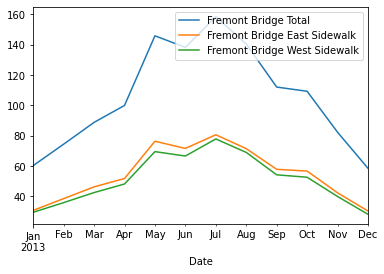

In [ ]:
month_fremont.loc['2013-01-01':'2014-01-01'].plot()
# east sidewalk is used more than west sidewalk in 2013
# and between april and september tehre is an increase in the whole data.

In [ ]:
month_fremont.loc['2016-01-01':'2017-01-01']
# It is clear that when the waether is cold bicycle usage decreases
# Also between April and september months demand is high.

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2016-01-31,69.533602,34.513441,35.020161
2016-02-29,86.754310,42.682471,44.071839
2016-03-31,93.948856,46.267833,47.681023
2016-04-30,130.054167,65.145833,64.908333
2016-05-31,153.439516,76.068548,77.370968
2016-06-30,149.468056,71.598611,77.869444
2016-07-31,142.047043,67.705645,74.341398
2016-08-31,151.048387,69.873656,81.174731
2016-09-30,130.773611,60.112500,70.661111


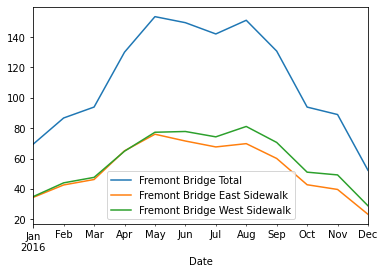

In [ ]:
# Visualization for 2016 usage over the months.
month_fremont.loc['2016-01-01':'2017-01-01'].plot() 

I will visualize this data into four categories.

Weekly, yearly, monthly and daily changes.

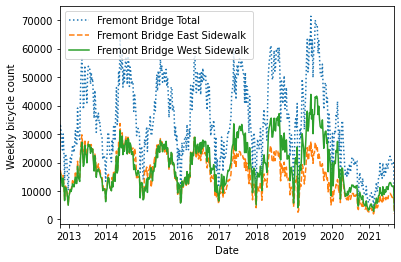

In [ ]:
weekly = Fremont_bridge.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count'); # here we can say between 2019 and 2020 west sidewalk crowded than east sidewalk.

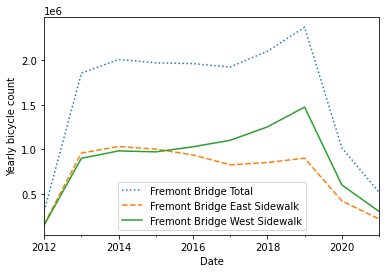

In [ ]:
# Let's visualize data this time for years.
yearly = Fremont_bridge.resample('Y').sum()
yearly.plot(style=[':', '--', '-'])
plt.ylabel('Yearly bicycle count'); # After 2016 west sidewalk  is used more than east sidewalk.

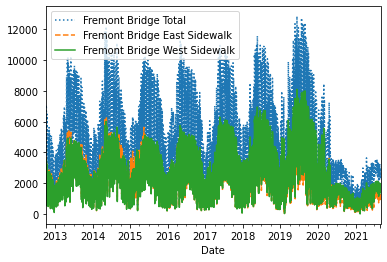

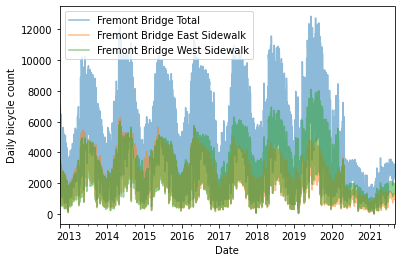

In [ ]:
# Let's visualize data this time for years.
daily = Fremont_bridge.resample('D').sum()
daily.plot(style=[':', '--', '-'])
daily.plot(alpha=0.5)  
plt.ylabel('Daily bicycle count'); # After 2016 west sidewalk  is used more than east sidewalk.

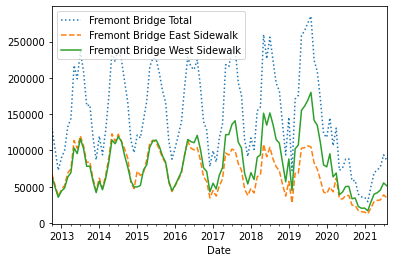

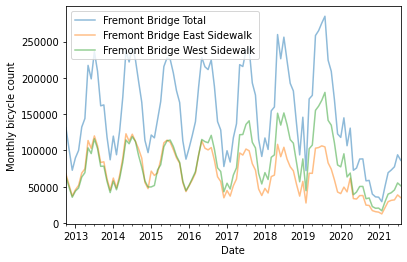

In [ ]:
# Let's visualize data this time for years.
monthy = Fremont_bridge.resample('M').sum()
monthy.plot(style=[':', '--', '-'])
monthy.plot(alpha=0.5)  
plt.ylabel('Monthly bicycle count'); # Two graphs 

## Here I will try different thing. First we know that data's index datetime. I will change it to month summation.

In [ ]:
daily_Fremont = Fremont_bridge.to_period('M')
daily_Fremont.groupby('Date').mean() 

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10,94.389368,48.511494,45.877874
2012-11,70.343056,36.197222,34.145833
2012-12,48.883065,25.010753,23.872312
2013-01,60.327957,30.793011,29.534946
2013-02,74.444940,38.538690,35.906250
...,...,...,...
2021-04,96.312500,40.901389,55.411111
2021-05,98.162634,42.018817,56.143817
2021-06,107.601389,44.298611,63.302778


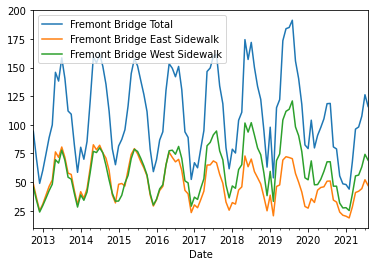

In [ ]:
daily_Fremont.groupby('Date').mean().plot() # I did this to see monthly change over the years.

# Task C

Make use of pandas eval() and query() functions on Fremont Bridge dataset.

In [ ]:
%timeit  Fremont_bridge[Fremont_bridge['Fremont Bridge Total'] < 60.000]

The slowest run took 5.90 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 5: 2.55 ms per loop


In [ ]:
# Fremont_bridge[Fremont_bridge['Fremont Bridge Total'] < 60.000]  
# 71714 rows

In [ ]:
type(Fremont_bridge)

pandas.core.frame.DataFrame

In [ ]:
Fremont_bridge.values.nbytes 
#You should not use eval() for simple expressions or for expressions involving small DataFrames.
#In fact, eval() is many orders of magnitude slower for smaller expressions/objects than plain ol’ Python.
# A good rule of thumb is to only use eval()
# when you have a DataFrame with more than 10,000 rows.
# since it is big it is good to use eval and query

3464976

In [ ]:
Fremont_bridge.eval("Fremont Bridge East Sidewalk +	Fremont Bridge West Sidewalk")
# I got this error !

SyntaxError: ignored

In [ ]:
type(yearly)

pandas.core.frame.DataFrame

# Since I got error with Fremont data frame, I used another data to use eval and query()

difference between eval and the other method can be seen below

In [ ]:
 %timeit data1.eval('High-Low')

100 loops, best of 5: 1.83 ms per loop


In [ ]:
%timeit data1['High']-data1['Low']

The slowest run took 6.47 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 192 µs per loop


In [ ]:
 %timeit data1.eval('Close-Open')

The slowest run took 6.19 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 5: 1.92 ms per loop


In [ ]:
%timeit data1['Close']-data1['Open']

The slowest run took 4.57 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 164 µs per loop


In [ ]:
%timeit data1.query('Open < 27.000' )

The slowest run took 4.03 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 5: 2.14 ms per loop


In [ ]:
data1.query('Open < 27.000' )

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.707485,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,22.218346,80516100
2012-11-15,26.879999,26.969999,26.629999,26.660000,22.229671,50955600
2012-11-16,26.670000,26.700001,26.340000,26.520000,22.112944,64083300
2012-11-19,26.799999,26.799999,26.469999,26.730000,22.288046,57179300
2012-11-20,26.760000,26.799999,26.459999,26.709999,22.271360,47070400
2012-11-21,26.709999,27.170000,26.670000,26.950001,22.471485,66360300
2012-12-03,26.780001,26.820000,26.400000,26.430000,22.037901,53173800
2012-12-04,26.500000,26.629999,26.340000,26.370001,21.987869,49777500


In [ ]:
%timeit data1[data1['Open']< 27.000]

1000 loops, best of 5: 616 µs per loop


In [ ]:
%timeit data1.query('Open<27.000 and Close>27.000')

100 loops, best of 5: 2.42 ms per loop


In [ ]:
%timeit data1[(data1['Open']<27.000) & (data1['Close']>27.000)]

The slowest run took 4.77 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 944 µs per loop


In [ ]:
# so we can conclude that if data is big eval and query method faster than the other method.